<a href="https://colab.research.google.com/github/vivsarraf/Project-4/blob/Ajunjee/Project_4_Price_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential, Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

#  Import and read the csv.
import pandas as pd
sales_data_df = pd.read_csv("cleaned-property-sales-data.csv")
sales_data_df.head()

,Bdrms,Baths_total,FinishedSqft,Lotsize,Sale_date,Year,Month,Sale_price
0,4,2,1182,33541,2023-12-15,2023,12,160000
1,3,3,1663,7200,2023-01-10,2023,1,270000
2,3,2,1311,7412,2023-12-27,2023,12,250000
3,3,2,1826,14948,2023-07-25,2023,7,275000
4,4,3,1828,19907,2023-02-13,2023,2,275000


In [2]:
sales_data_df = sales_data_df.rename(columns={'Bdrms':'Bedrooms', 'Baths_total': 'Bathrooms'})
sales_data_df.head()

,Bedrooms,Bathrooms,FinishedSqft,Lotsize,Sale_date,Year,Month,Sale_price
0,4,2,1182,33541,2023-12-15,2023,12,160000
1,3,3,1663,7200,2023-01-10,2023,1,270000
2,3,2,1311,7412,2023-12-27,2023,12,250000
3,3,2,1826,14948,2023-07-25,2023,7,275000
4,4,3,1828,19907,2023-02-13,2023,2,275000


In [3]:
sales_data_df.isnull().sum()

Bedrooms        0
Bathrooms       0
FinishedSqft    0
Lotsize         0
Sale_date       0
Year            0
Month           0
Sale_price      0
dtype: int64

In [4]:
sales_data_df['Sale_date'] = pd.to_datetime(sales_data_df['Sale_date'], infer_datetime_format=True, format='mixed')
sales_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14884 entries, 0 to 14883
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Bedrooms      14884 non-null  int64         
 1   Bathrooms     14884 non-null  int64         
 2   FinishedSqft  14884 non-null  int64         
 3   Lotsize       14884 non-null  int64         
 4   Sale_date     14884 non-null  datetime64[ns]
 5   Year          14884 non-null  int64         
 6   Month         14884 non-null  int64         
 7   Sale_price    14884 non-null  int64         
dtypes: datetime64[ns](1), int64(7)
memory usage: 930.4 KB


<ipython-input-4-dfecf60e65d3>:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  sales_data_df['Sale_date'] = pd.to_datetime(sales_data_df['Sale_date'], infer_datetime_format=True, format='mixed')


In [5]:
y = sales_data_df.Sale_price.values
X = sales_data_df.drop(columns = ['Sale_price', 'Sale_date','Month'], axis=1)
X.head()


,Bedrooms,Bathrooms,FinishedSqft,Lotsize,Year
0,4,2,1182,33541,2023
1,3,3,1663,7200,2023
2,3,2,1311,7412,2023
3,3,2,1826,14948,2023
4,4,3,1828,19907,2023


In [6]:
# Split the preprocessed data into a training and testing dataset
# Assign the function a random_state equal to 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, train_size=0.9, random_state=1)

In [7]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the features training dataset
X_scaler = scaler.fit(X_train)

# Fit the scaler to the features training dataset
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [8]:
# Define the the number of inputs (features) to the model
number_input_features = len(X.iloc[0])

# Review the number of features
number_input_features

5

In [9]:
# Define the number of neurons in the output layer
number_output_neurons = 1

# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1 = 16

# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2 = 16

# Review the number hidden nodes in the second layer
hidden_nodes_layers = hidden_nodes_layer1 + hidden_nodes_layer2
hidden_nodes_layers

32

In [10]:
# Create the Sequential model instance
nn = Sequential()

# Add the first hidden layer
nn.add(Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Add the second hidden layer
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))

# Add the output layer to the model specifying the number of output neurons and activation function
nn.add(Dense(units=number_output_neurons, activation="sigmoid"))

In [11]:
# Display the Sequential model summary
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                96        
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 385 (1.50 KB)
Trainable params: 385 (1.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
# Compile the Sequential model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [13]:
# Horrible accuracy for NN, please disregard
# Fit the model using 100 epochs and the training data
# fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

In [14]:
# # Evaluate the model loss and accuracy metrics using the evaluate method and the TRAIN data
# model_loss, model_accuracy = nn.evaluate(X_train_scaled, y_train,verbose=0)

# # Display the model loss and accuracy results
# print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

In [15]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

print("By using Linear Regression we got:")
print("Training data accuracy",lr_model.score(X_train, y_train))
print("Testing data accuracy",lr_model.score(X_test, y_test))

By using Linear Regression we got:
Training data accuracy 0.2871992309951692
Testing data accuracy 0.28490135481024925


In [16]:
# Failed, could not converge
# from sklearn.linear_model import LogisticRegression
# log_model = LogisticRegression()
# log_model.fit(X_train_scaled, y_train)

# print("By using Logistic Regression we got:")
# print("Training data accuracy",log_model.score(X_train_scaled, y_train))
# print("Testing data accuracy",log_model.score(X_test_scaled, y_test))

In [17]:
from sklearn.ensemble import RandomForestRegressor
rfm=RandomForestRegressor()
rfm.fit(X_train_scaled,y_train)

print("By using Random Forest Regression we got:")
print("Training data accuracy",rfm.score(X_train_scaled,y_train))
print("Testing data accuracy",rfm.score(X_test_scaled,y_test))

By using Random Forest Regression we got:
Training data accuracy 0.9090967690162849
Testing data accuracy 0.3645125658139752


In [38]:
rfm.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [39]:
rfm=RandomForestRegressor(max_depth=None,min_samples_leaf=5,min_samples_split=6,
                          n_estimators=120,verbose=2,n_jobs=-1)

In [40]:
rfm.fit(X_train_scaled,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 120
building tree 2 of 120
building tree 3 of 120
building tree 4 of 120
building tree 5 of 120
building tree 6 of 120
building tree 7 of 120
building tree 8 of 120
building tree 9 of 120
building tree 10 of 120
building tree 11 of 120
building tree 12 of 120
building tree 13 of 120
building tree 14 of 120
building tree 15 of 120
building tree 16 of 120
building tree 17 of 120
building tree 18 of 120
building tree 19 of 120
building tree 20 of 120
building tree 21 of 120
building tree 22 of 120
building tree 23 of 120
building tree 24 of 120building tree 25 of 120

building tree 26 of 120
building tree 27 of 120
building tree 28 of 120
building tree 29 of 120
building tree 30 of 120
building tree 31 of 120
building tree 32 of 120
building tree 33 of 120
building tree 34 of 120
building tree 35 of 120
building tree 36 of 120
building tree 37 of 120
building tree 38 of 120


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    1.4s


building tree 39 of 120
building tree 40 of 120
building tree 41 of 120
building tree 42 of 120
building tree 43 of 120
building tree 44 of 120building tree 45 of 120

building tree 46 of 120
building tree 47 of 120
building tree 48 of 120
building tree 49 of 120
building tree 50 of 120
building tree 51 of 120
building tree 52 of 120
building tree 53 of 120
building tree 54 of 120
building tree 55 of 120
building tree 56 of 120
building tree 57 of 120
building tree 58 of 120
building tree 59 of 120
building tree 60 of 120
building tree 61 of 120
building tree 62 of 120
building tree 63 of 120
building tree 64 of 120
building tree 65 of 120
building tree 66 of 120
building tree 67 of 120
building tree 68 of 120
building tree 69 of 120
building tree 70 of 120
building tree 71 of 120
building tree 72 of 120
building tree 73 of 120
building tree 74 of 120
building tree 75 of 120
building tree 76 of 120
building tree 77 of 120
building tree 78 of 120
building tree 79 of 120
building tree 80

[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    4.2s finished


RandomForestRegressor(min_samples_leaf=5, min_samples_split=6, n_estimators=120,
                      n_jobs=-1, verbose=2)

In [41]:
print("By using Tuned Random Forest Regression we got:")
print("Training data accuracy",rfm.score(X_train_scaled,y_train))
print("Testing data accuracy",rfm.score(X_test_scaled,y_test))

By using Tuned Random Forest Regression we got:


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 120 out of 120 | elapsed:    0.7s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 120 out of 120 | elapsed:    0.2s finished


Training data accuracy 0.6512136784839127
Testing data accuracy 0.4083611492111001


In [18]:
y_pred = rfm.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [19]:
# Calculating R2 value or Coefficient of Determination
test_set_r2 = r2_score(y_test, y_pred)
print("Coefficient of Determination:",test_set_r2)

Coefficient of Determination: -67.63479254564469


In [20]:
# Calculating MAE or Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:",mae)

Mean Absolute Error: 927434.7814372061


In [21]:
# Calculating RMSE or Root Mean Square Error
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 932874.3678154363


In [22]:
# Comparing the MAE with Mean of the actual values (y_test)
print(f"The MAE is {(mae/np.mean(y_test))*100:.2f}% of Average of y_test ({np.mean(y_test):,.0f})")

The MAE is 480.77% of Average of y_test (192,905)


In [23]:
# Comparing the RMSE with Mean of the actual values (y_test)
print(f"The RMSE is {(rmse/np.mean(y_test))*100:.2f}% of Average of y_test ({np.mean(y_test):,.0f})")

The RMSE is 483.59% of Average of y_test (192,905)


In [24]:
# Comparing some of the individual actual values (y_test) with their respective predicted values (y_pred)
for i in range(50):
    print(f"y_test[{i}]: {y_test[i]:10,.0f}    y_pred[{i}]: {y_pred[i]:10,.0f}   Difference (% of y_test): {((y_pred[i]-y_test[i])/y_test[i])*100:6.2f}%")

y_test[0]:    210,000    y_pred[0]:  1,197,420   Difference (% of y_test): 470.20%
y_test[1]:    135,000    y_pred[1]:  1,094,395   Difference (% of y_test): 710.66%
y_test[2]:    210,000    y_pred[2]:  1,082,775   Difference (% of y_test): 415.61%
y_test[3]:    157,000    y_pred[3]:  1,123,940   Difference (% of y_test): 615.89%
y_test[4]:    343,000    y_pred[4]:  1,123,940   Difference (% of y_test): 227.68%
y_test[5]:    250,000    y_pred[5]:  1,123,940   Difference (% of y_test): 349.58%
y_test[6]:    148,500    y_pred[6]:  1,123,940   Difference (% of y_test): 656.86%
y_test[7]:    250,000    y_pred[7]:  1,167,490   Difference (% of y_test): 367.00%
y_test[8]:    145,000    y_pred[8]:  1,094,395   Difference (% of y_test): 654.76%
y_test[9]:    137,500    y_pred[9]:  1,123,940   Difference (% of y_test): 717.41%
y_test[10]:    142,500    y_pred[10]:  1,123,940   Difference (% of y_test): 688.73%
y_test[11]:    886,827    y_pred[11]:  1,141,045   Difference (% of y_test):  28.67%


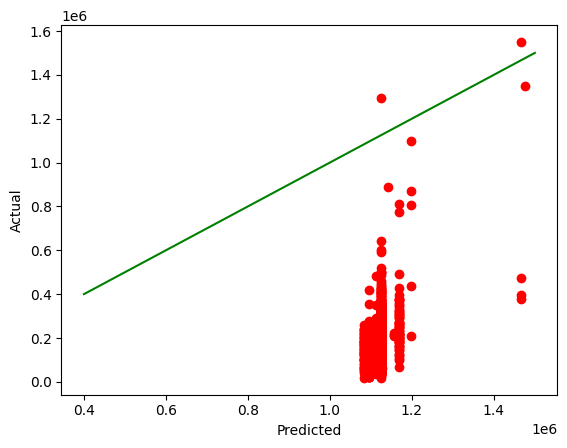

In [25]:
# Plotting graph between real and predicted values
plt.plot(y_pred,y_test,'ro')
plt.plot([400000,1500000],[400000,1500000], 'g-')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [26]:
sales_data_df.head()

,Bedrooms,Bathrooms,FinishedSqft,Lotsize,Sale_date,Year,Month,Sale_price
0,4,2,1182,33541,2023-12-15,2023,12,160000
1,3,3,1663,7200,2023-01-10,2023,1,270000
2,3,2,1311,7412,2023-12-27,2023,12,250000
3,3,2,1826,14948,2023-07-25,2023,7,275000
4,4,3,1828,19907,2023-02-13,2023,2,275000


In [27]:
listings_data_df = pd.read_csv("original_extracted_df_MilwaukeeOnly.csv")
listings_data_df.head()

,State,City,Street,Zipcode,Latitude,Longitude,Bedroom,Bathroom,Area,PPSq,LotArea,ConvertedLot,LotUnit,MarketEstimate,RentEstimate,Price
0,WI,Milwaukee,North 26th STREET,53206,43.076214,-87.946370,4,2,NaN,NaN,3920.40,0.09,sqft,NaN,1425.0,7000
1,WI,Milwaukee,North 37th STREET,53210,43.066345,-87.959490,4,2,1714.0,20.361727,3484.80,0.08,sqft,NaN,1345.0,34900
2,WI,Milwaukee,North Sherman BOULEVARD UNIT 4326,53216,43.095818,-87.966620,4,2,1500.0,83.266667,0.62,0.62,acres,NaN,NaN,124900
3,WI,Milwaukee,North 25th STREET,53205,43.056957,-87.944756,3,2,1184.0,114.020270,4356.00,0.10,sqft,132800.0,1500.0,135000
4,WI,Milwaukee,North 86th PLACE,53225,43.121850,-88.019295,3,2,1271.0,106.215578,7840.80,0.18,sqft,136300.0,1875.0,135000


In [28]:
listings_data_df = listings_data_df.drop(columns=['PPSq', 'ConvertedLot','LotUnit','RentEstimate'], axis=1)
listings_data_df = listings_data_df[['Street', 'City', 'State', 'Zipcode', 'Latitude', 'Longitude', 'Bedroom', 'Bathroom', 'Area','LotArea', 'Price','MarketEstimate']]
listings_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Street          33 non-null     object 
 1   City            33 non-null     object 
 2   State           33 non-null     object 
 3   Zipcode         33 non-null     int64  
 4   Latitude        33 non-null     float64
 5   Longitude       33 non-null     float64
 6   Bedroom         33 non-null     int64  
 7   Bathroom        33 non-null     int64  
 8   Area            32 non-null     float64
 9   LotArea         28 non-null     float64
 10  Price           33 non-null     int64  
 11  MarketEstimate  26 non-null     float64
dtypes: float64(5), int64(4), object(3)
memory usage: 3.2+ KB


In [29]:
listings_data_df = listings_data_df.rename(columns={'Bedroom': 'Bedrooms', 'Bathroom':'Bathrooms','Area':'FinishedSqft', 'LotArea': 'Lotsize'})
listings_data_df.head()

,Street,City,State,Zipcode,Latitude,Longitude,Bedrooms,Bathrooms,FinishedSqft,Lotsize,Price,MarketEstimate
0,North 26th STREET,Milwaukee,WI,53206,43.076214,-87.946370,4,2,NaN,3920.40,7000,NaN
1,North 37th STREET,Milwaukee,WI,53210,43.066345,-87.959490,4,2,1714.0,3484.80,34900,NaN
2,North Sherman BOULEVARD UNIT 4326,Milwaukee,WI,53216,43.095818,-87.966620,4,2,1500.0,0.62,124900,NaN
3,North 25th STREET,Milwaukee,WI,53205,43.056957,-87.944756,3,2,1184.0,4356.00,135000,132800.0
4,North 86th PLACE,Milwaukee,WI,53225,43.121850,-88.019295,3,2,1271.0,7840.80,135000,136300.0


In [30]:
listings_data_df.isnull().sum()

Street            0
City              0
State             0
Zipcode           0
Latitude          0
Longitude         0
Bedrooms          0
Bathrooms         0
FinishedSqft      1
Lotsize           5
Price             0
MarketEstimate    7
dtype: int64

In [31]:
listings_data_df=listings_data_df.dropna(subset=['FinishedSqft','Lotsize'])
listings_data_df.isnull().sum()

Street            0
City              0
State             0
Zipcode           0
Latitude          0
Longitude         0
Bedrooms          0
Bathrooms         0
FinishedSqft      0
Lotsize           0
Price             0
MarketEstimate    4
dtype: int64

In [32]:
X.head()

,Bedrooms,Bathrooms,FinishedSqft,Lotsize,Year
0,4,2,1182,33541,2023
1,3,3,1663,7200,2023
2,3,2,1311,7412,2023
3,3,2,1826,14948,2023
4,4,3,1828,19907,2023


In [33]:
prediction1_df = listings_data_df.copy()
prediction1_df['Year'] = 2024
prediction1_df.head()

,Street,City,State,Zipcode,Latitude,Longitude,Bedrooms,Bathrooms,FinishedSqft,Lotsize,Price,MarketEstimate,Year
1,North 37th STREET,Milwaukee,WI,53210,43.066345,-87.959490,4,2,1714.0,3484.80,34900,NaN,2024
2,North Sherman BOULEVARD UNIT 4326,Milwaukee,WI,53216,43.095818,-87.966620,4,2,1500.0,0.62,124900,NaN,2024
3,North 25th STREET,Milwaukee,WI,53205,43.056957,-87.944756,3,2,1184.0,4356.00,135000,132800.0,2024
4,North 86th PLACE,Milwaukee,WI,53225,43.121850,-88.019295,3,2,1271.0,7840.80,135000,136300.0,2024
5,North 35th STREET,Milwaukee,WI,53216,43.095448,-87.957344,2,1,667.0,4356.00,137500,139700.0,2024


In [34]:
prediction2_df = listings_data_df.copy()
prediction2_df['Year'] = 2026
prediction3_df = listings_data_df.copy()
prediction3_df['Year'] = 2028

In [35]:
X_pred1 = prediction1_df[['Bedrooms', 'Bathrooms','FinishedSqft', 'Lotsize','Year']]
y_predicted_sales1 = rfm.predict(X_pred1)
X_pred2 = prediction2_df[['Bedrooms', 'Bathrooms','FinishedSqft', 'Lotsize','Year']]
y_predicted_sales2 = rfm.predict(X_pred2)
X_pred3 = prediction3_df[['Bedrooms', 'Bathrooms','FinishedSqft', 'Lotsize','Year']]
y_predicted_sales3 = rfm.predict(X_pred3)

listings_data_df['2024 Forecasted House Price'] = y_predicted_sales1
listings_data_df['2026 Forecasted House Price'] = y_predicted_sales2
listings_data_df['2028 Forecasted House Price'] = y_predicted_sales3

listings_data_df

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


,Street,City,State,Zipcode,Latitude,Longitude,Bedrooms,Bathrooms,FinishedSqft,Lotsize,Price,MarketEstimate,2024 Forecasted House Price,2026 Forecasted House Price,2028 Forecasted House Price
1,North 37th STREET,Milwaukee,WI,53210,43.066345,-87.959490,4,2,1714.0,3484.80,34900,NaN,1123940.00,1123940.00,1123940.00
2,North Sherman BOULEVARD UNIT 4326,Milwaukee,WI,53216,43.095818,-87.966620,4,2,1500.0,0.62,124900,NaN,1143410.24,1143410.24,1143410.24
3,North 25th STREET,Milwaukee,WI,53205,43.056957,-87.944756,3,2,1184.0,4356.00,135000,132800.0,1123940.00,1123940.00,1123940.00
4,North 86th PLACE,Milwaukee,WI,53225,43.121850,-88.019295,3,2,1271.0,7840.80,135000,136300.0,1123940.00,1123940.00,1123940.00
5,North 35th STREET,Milwaukee,WI,53216,43.095448,-87.957344,2,1,667.0,4356.00,137500,139700.0,1082775.36,1082775.36,1082775.36
6,North 17th STREET NORTH North,Milwaukee,WI,53206,43.069004,-87.934100,3,2,902.0,0.00,140000,NaN,1141045.00,1141045.00,1141045.00
7,West Eden PLACE,Milwaukee,WI,53220,42.980330,-88.002720,3,1,1156.0,7840.80,144900,157300.0,1094395.36,1094395.36,1094395.36
8,South 8th STREET,Milwaukee,WI,53215,42.996044,-87.921000,3,1,1400.0,3484.80,155000,156700.0,1094395.36,1094395.36,1094395.36
10,North Sherman BOULEVARD,Milwaukee,WI,53216,43.077385,-87.966930,4,2,1972.0,0.96,163500,162900.0,1234174.12,1234174.12,1234174.12
11,North 78th STREET,Milwaukee,WI,53222,43.074600,-88.009514,2,1,953.0,4791.60,179000,192900.0,1082775.36,1082775.36,1082775.36
